# Feature Scaling unsing sklearn (scikit-learn)

Feature Scaling is a technique used to standardize the range of features in a dataset, transforming your data to make it more optimized for modelling.

Real-world datasets often contain features that vary in degrees of magnitude, range and units, ie: weight - 197 pounds, distance_ran - 4 miles, without scaling, your model will think the feature “weight” is generally larger than “distance_ran” and would give more emphasis to “weight” even tho “weight” and “distance_ran” are just separate unit of measurements with different magnitudes.

For machine learning models to interpret these features on the same scale we need to perform feature scaling, the purpose is to ensure that all features contribute equally to the model and to avoid the dominance of features with larger values.

And the variations in feature values can lead to biased model performance or difficulties during the learning process.

It is good practice to fit the scales on the training data and then use it to transform testing data. This would avoid any leakage during the model testing process.
Scaling target values are generally not required.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_test = pd.read_csv(r"C:/Users/user/Documents/datasets/big_mart_test.csv")
df_train = pd.read_csv(r"C:/Users/user/Documents/datasets/big_mart_train.csv")

In [12]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
# seprating numerical columns to scale
numerical_df_train = df_train[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
numerical_df_test = df_test[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

## Unscaled Data

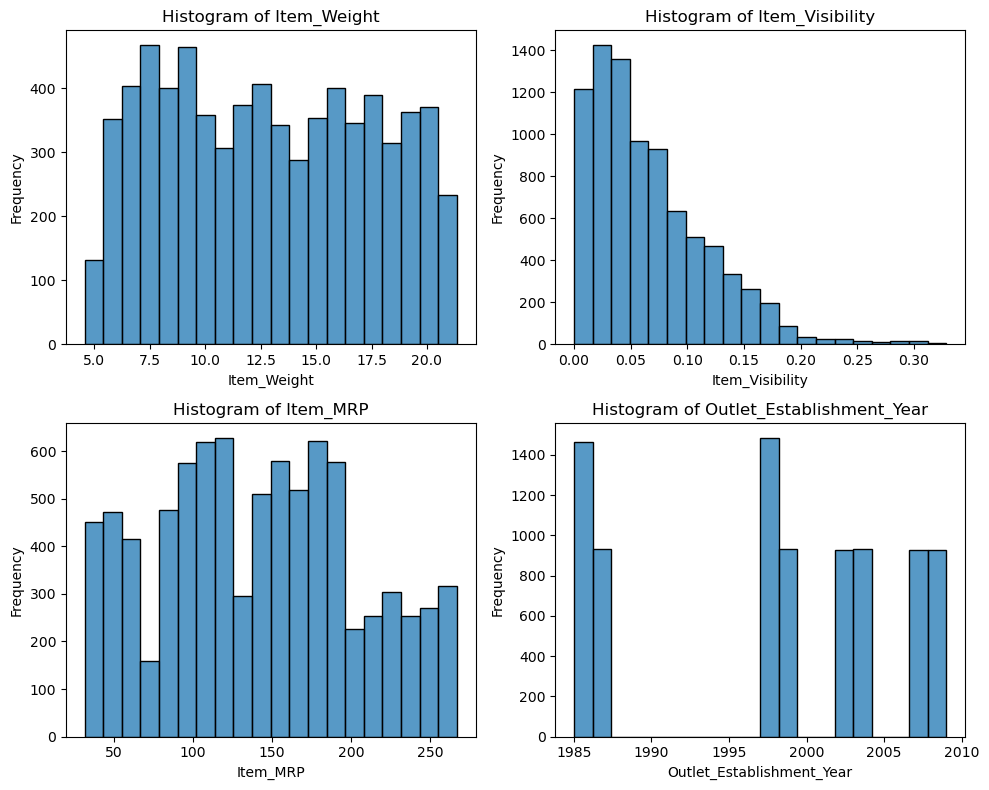

In [67]:
# Set up the matplotlib figure with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column and plot a histogram
for i, column in enumerate(numerical_df_train):
    sns.histplot(numerical_df_train[column], ax=axes[i], bins=20, kde=False)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Loop through each numerical column and create a separate histogram plot
for column in numerical_df_train.select_dtypes(include='number'):
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    sns.histplot(numerical_df_train[column], bins=30, kde=False)
    
    # save plt as img
    plt.savefig(f"{column}_without_scaling.png")
    plt.show()

## Normalization using MinMaxScaler

Normalization is a data preprocessing technique used to adjust the values of features in a dataset to a common scale.
When normalizing features, values are shited and rescaled so tht they end up ranging from 0 to 1. Normalization is also known as min-max scaling.

In [16]:
# fit scaler on training data
norm = MinMaxScaler().fit(numerical_df_train)

# transfrom training data
df_train_norm = norm.transform(numerical_df_train)

# transform testing data
df_test_norm = norm.transform(numerical_df_test)

In [18]:
df_train_norm = pd.DataFrame(df_train_norm)
df_test_norm = pd.DataFrame(df_test_norm)

In [25]:
df_test_norm.head()

,0,1,2,3
0,0.964275,0.023036,0.325012,0.583333
1,0.222983,0.117018,0.237819,0.916667
2,0.598095,0.303221,0.893316,0.541667
3,0.164335,0.046860,0.525233,0.916667
4,NaN,0.361153,0.861381,0.000000


In [35]:
# Rename the columns
new_column_names = {0: 'Item_Weight',
                    1: 'Item_Visibility',
                    2: 'Item_MRP',
                   3: 'Outlet_Establishment_Year'}

df_train_norm.rename(columns=new_column_names, inplace=True)
df_test_norm.rename(columns=new_column_names, inplace=True)

In [21]:
numerical_df_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987


In [36]:
df_train_norm.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

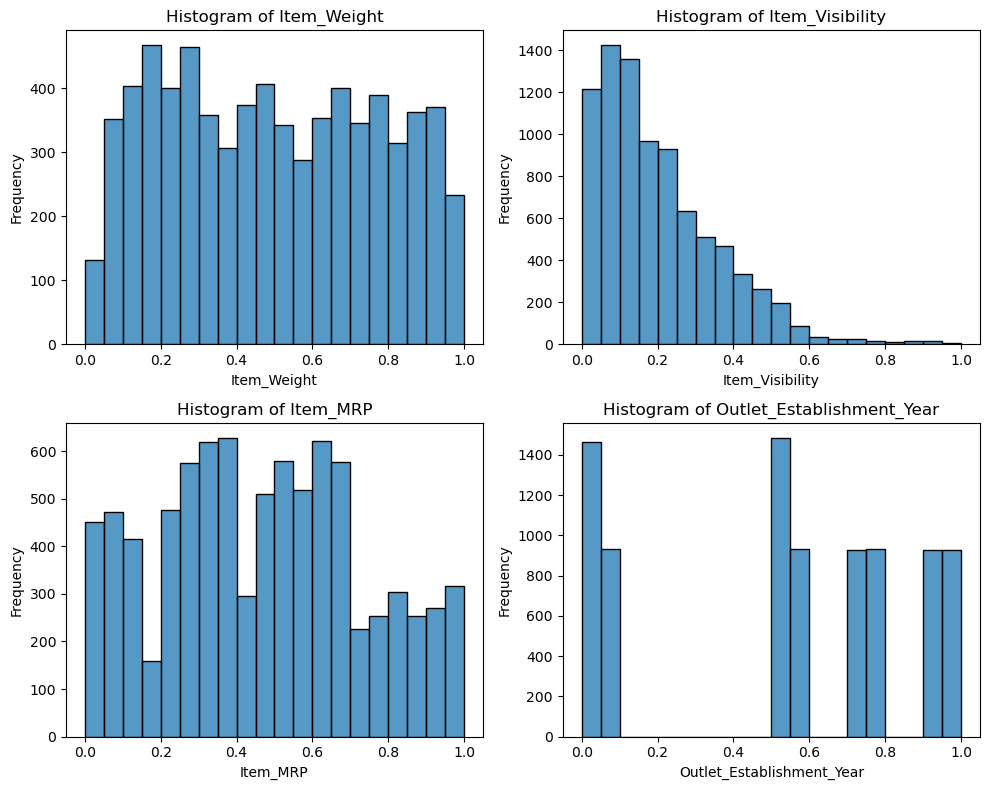

In [59]:
# Set up the matplotlib figure with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column and plot a histogram
for i, column in enumerate(df_train_norm):
    sns.histplot(df_train_norm[column], ax=axes[i], bins=20, kde=False)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Loop through each numerical column and create a separate histogram plot
for column in df_train_norm.select_dtypes(include='number'):
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    sns.histplot(df_train_norm[column], kde=False)
    
    # Save the plot as an image file (e.g., PNG)
    plt.savefig(f"{column}_normalization.png")
    plt.show()

## Standardization

Standardization is another scaling method where the values are centred around the mean with a unit standard deviation. This means that the mean of your feature becomes zero and the resultant distribution has a unit standard deviation


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
df_train_stand = numerical_df_train.copy()
df_test_stand = numerical_df_test.copy()

In [46]:
# fit scaler on training data
scale = StandardScaler().fit(df_train_stand)

# transform training data
train_stand = scale.transform(df_train_stand)

# transform testing data
test_stand = scale.transform(df_test_stand)

In [48]:
# convert to Dataframe
train_stand = pd.DataFrame(train_stand)
test_stand = pd.DataFrame(test_stand)

In [50]:
# Rename the columns
new_column_names = {0: 'Item_Weight',
                    1: 'Item_Visibility',
                    2: 'Item_MRP',
                   3: 'Outlet_Establishment_Year'}

train_stand.rename(columns=new_column_names, inplace=True)
test_stand.rename(columns=new_column_names, inplace=True)

In [51]:
train_stand.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.766217,-0.970732,1.747454,0.139541
1,-1.494175,-0.908111,-1.489023,1.334103
2,0.999834,-0.956917,0.010040,0.139541
3,1.365966,-1.281758,0.660050,0.020085
4,-0.845905,-1.281758,-1.399220,-1.293934


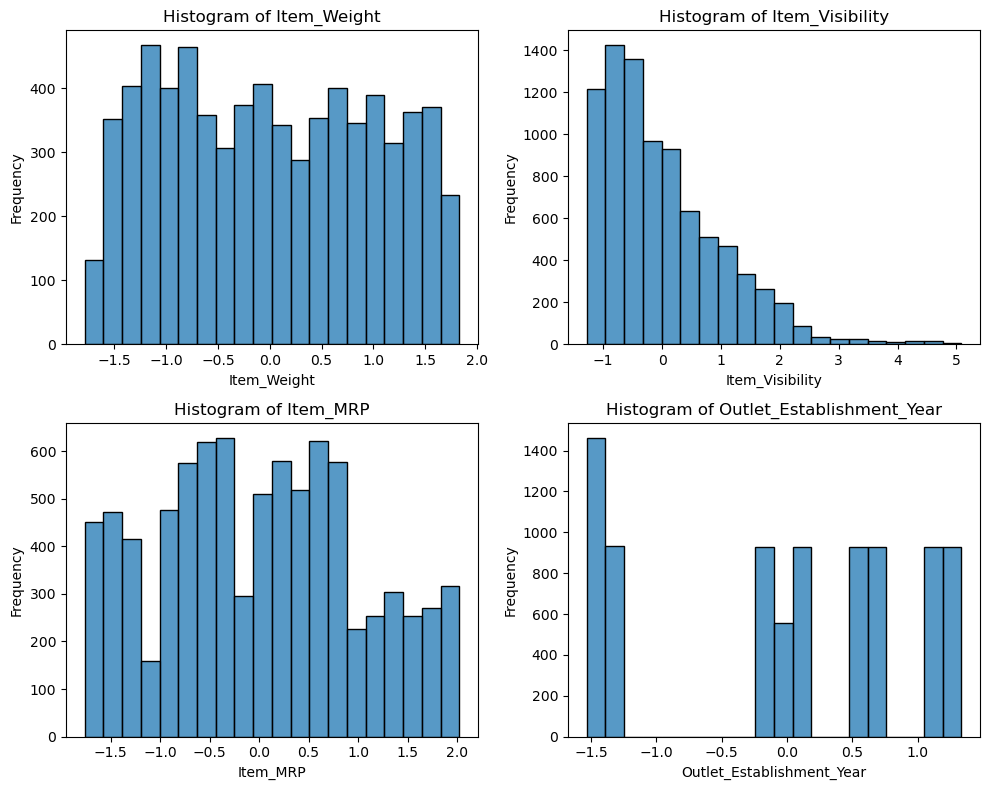

In [61]:
# Set up the matplotlib figure with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column and plot a histogram
for i, column in enumerate(train_stand):
    sns.histplot(train_stand[column], ax=axes[i], bins=20, kde=False)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Loop through each numerical column and create a separate histogram plot
for column in train_stand.select_dtypes(include='number'):
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    sns.histplot(train_stand[column], kde=False)
    
    # save plot as img
    plt.savefig(f"{column}_standerdized.png")

# Conclusion

Some features in your dataset can be normalized while some standardized, it depends on the nature of the feature which you will have to identify and choose what scaling method to apply.